# 1. Introduction

Nama: Aldiandya Irsyad  
Batch: 8

# 2. Libraries & Config

In [1]:
# Data Structures
import warnings
from importlib import reload
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
import pandas_profiling

# Algorithms
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report
# import sklearn pipeline
from sklearn.pipeline import Pipeline

# from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers





# utilities
from IPython.display import Image
import utilities as util
import pickle
# Configuration
random_state = 231019
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:,.4f}'.format
tf.random.set_seed(random_state)
np.random.seed(random_state)
colors = sns.color_palette()
set_config(display="diagram")
warnings.filterwarnings('ignore')

# 3. Data Loading

**Read the Dataset**

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


**Check the name of the dataset**

In [3]:
util.show_columns_name(dataset, 7)

,0,1,2,3,4,5,6
0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService
1,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
2,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**rename dataset columns to snake case**

In [4]:
dataset.columns = util.to_snake_case(dataset.columns)
util.show_columns_name(dataset, 7)


,0,1,2,3,4,5,6
0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service
1,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv
2,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


**Check the dataset**

In [5]:
dataset.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


# 4. Exploratory Data Analysis

**Creating a copy of the datast**

In [6]:
eda = dataset.copy()

## A. Dataset Summary

In [7]:
# WARNING: Doesn't show on github correctly. The content of the file will be explained as goes on

eda.profile_report()


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Dataset Potential Problems:

High Cardinality:
- `customer_id` (7043 Distinct Values)
- `total_charges` (6531 Distinct Values)

High Correlation:
- `online_security` with `device_protection` and 5 other fields
- `device_protection` with `online_security` and 5 other fields
- `phone_service` with `multiple_lines`
- `internet_service` with `online_security` and 5 other fields
- `streaming_movies` with `online_security` and 5 other fields
- `multiple_lines` with `phone_service`
- `online_backup` with `online_security` and 5 other fields
- `tech_support` with `online_security` and 5 other fields
- `streaming_tv` with `online_security` and 5 other fields
- `partner` with `dependents`
- `dependents` with `partner`
- `tenure` with `contract`
- `phone_service` with `multiple_lines` and 1 other fields
- `multiple_lines` with `phone_service` and 8 other fields
- `internet_service` with `multiple_lines` and 8 other fields
- `online_security` with `multiple_lines` and 8 other fields
- `online_backup` with `multiple_lines` and 8 other fields
- `device_protection` with `multiple_lines` and 8 other fields
- `tech_support` with `multiple_lines` and 8 other fields
- `streaming_tv` with `multiple_lines` and 8 other fields
- `streaming_movies` with `multiple_lines` and 8 other fields
- `contract` with `tenure` and 7 other fields
- `monthly_charges` with `phone_service` and 8 other fields

Low Variance & Uniform:
- `customer_id` is uniformly distributed
- `total_charges` is uniformly distributed
- `customer_id` has all unique values

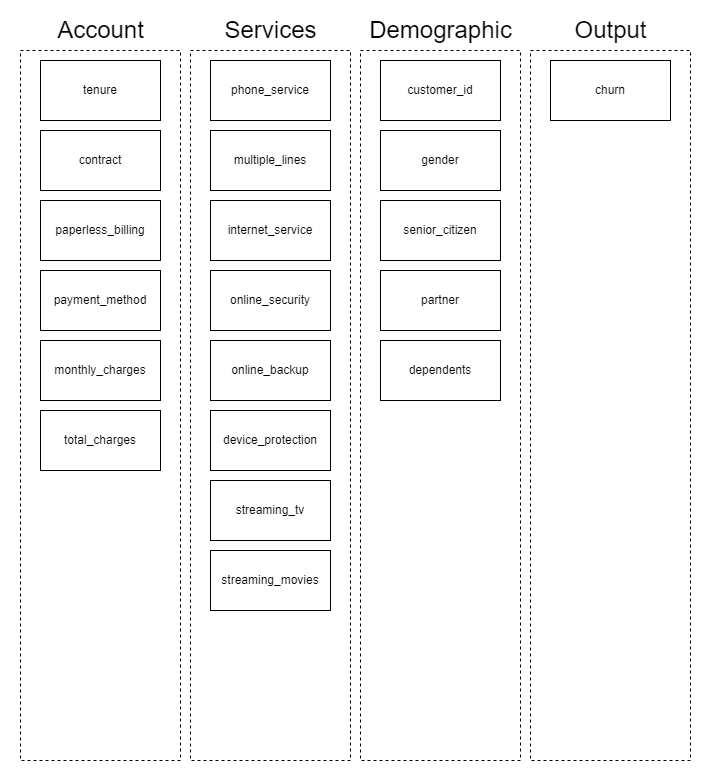

In [8]:
Image(filename='img/p2m1_01.png')

## B. Removing Identifier

In [9]:
eda.drop("customer_id", axis=1, inplace=True)
eda.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


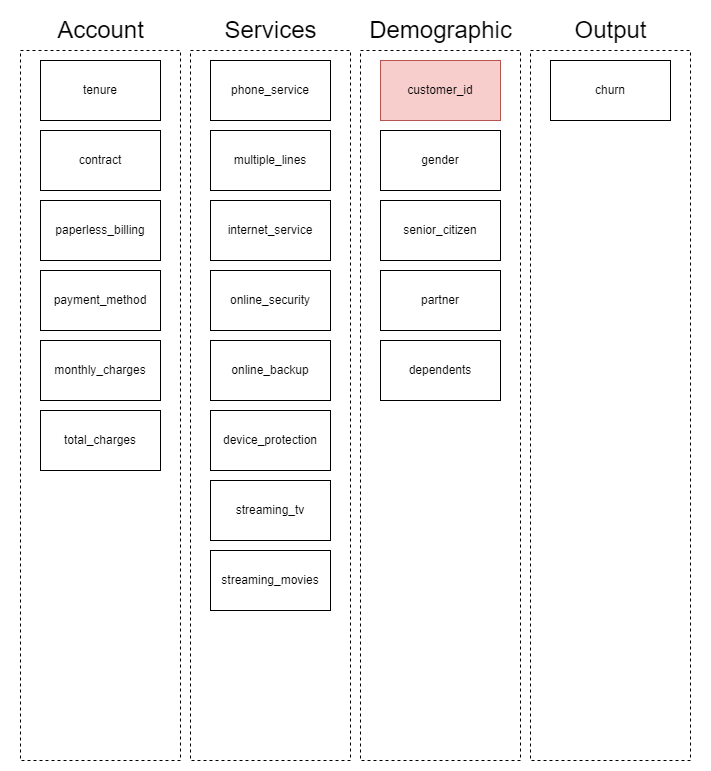

In [10]:
Image(filename='img/p2m1_02.png')

## C. Churn Percentage

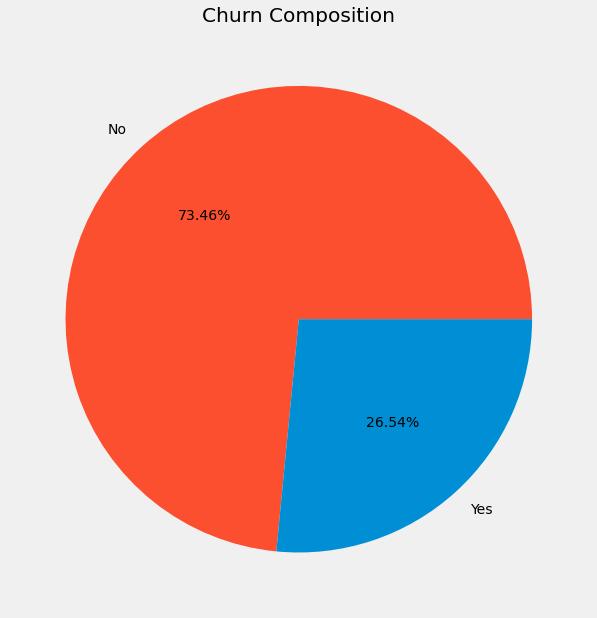

In [11]:
fig, ax = plt.subplots()
ax.pie(eda.groupby('churn').size(), autopct='%1.2f%%',
       labels=['No', 'Yes'], colors=[colors[1], colors[0]])
ax.set_title('Churn Composition')
plt.show()


## D. High Cardinality Columns

The first one in `total_charges` it was mistaken as `object`. I tried to change to `float` however it seems there are empty spaces inside of the data.  
I'm going to assume that the data were null instead of 0. 

In [12]:
eda['total_charges'].replace(" ", 0, inplace=True)
eda['total_charges'] = eda['total_charges'].astype(float)

`customer_id` has 100% unique values. It's clearly an indentifier from the name and the values.

## E. Correlation Analysis

In [13]:
# get numerical cols
eda['senior_citizen'] = eda['senior_citizen'].astype(str)

numerical_cols = [cname for cname in eda.columns if eda[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in eda.columns if eda[cname].dtype == 'object']


In [14]:
print(util.correlation_matrix.__doc__)


Return correlation matrix of all types.
    Categorical VS Categorical: Cramers V
    Categorical VS Numerical: Correlation Ratio
    Numerical VS Numerical: Pearson's Correlation Coefficient
    Parameters:
        - dfi: dataframe
        - cats: list of categorical columns names
        - nums: list of numerical columns names


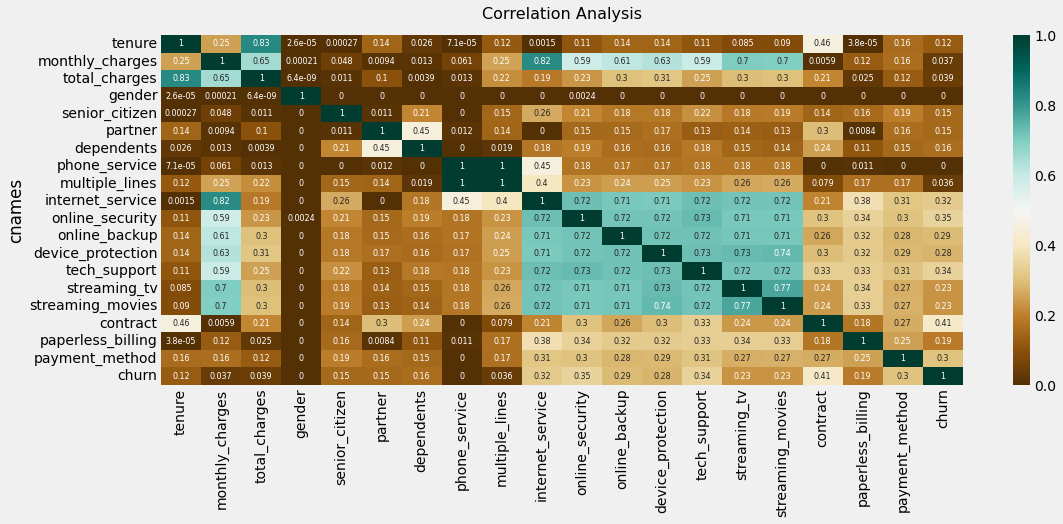

In [15]:
cm = util.correlation_matrix(eda.replace(
    {"No": 0, "Yes": 1}), categorical_cols, numerical_cols)
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(cm.abs(), dtype=np.bool_))
heatmap = sns.heatmap(cm.abs(), vmin=0, vmax=1, annot=True,
                      annot_kws={"fontsize": 8}, cmap='BrBG')
heatmap.set_title('Correlation Analysis', fontdict={'fontsize': 16}, pad=16)

plt.show()


**`total_charges`, `tenure` and `monthly_charges`**

`monthly_charges` is the amount customer paid monthly.  
`tenure` is the number of month customer have been using our services.  
`total_charges` is the amount of customer paid from beginning.  

We can assume that `total_charges` will have very high correlation with `tenure` and `monthly_charges`

In [16]:
new_total_charges = eda['monthly_charges'] * eda['tenure']

eda['total_charges'].corr(new_total_charges)

0.9995605537972276

Our hypothesis is correct, we can try to elimate `total_charges` because `tenure` and `monthly_charges` gives the whole picture more.

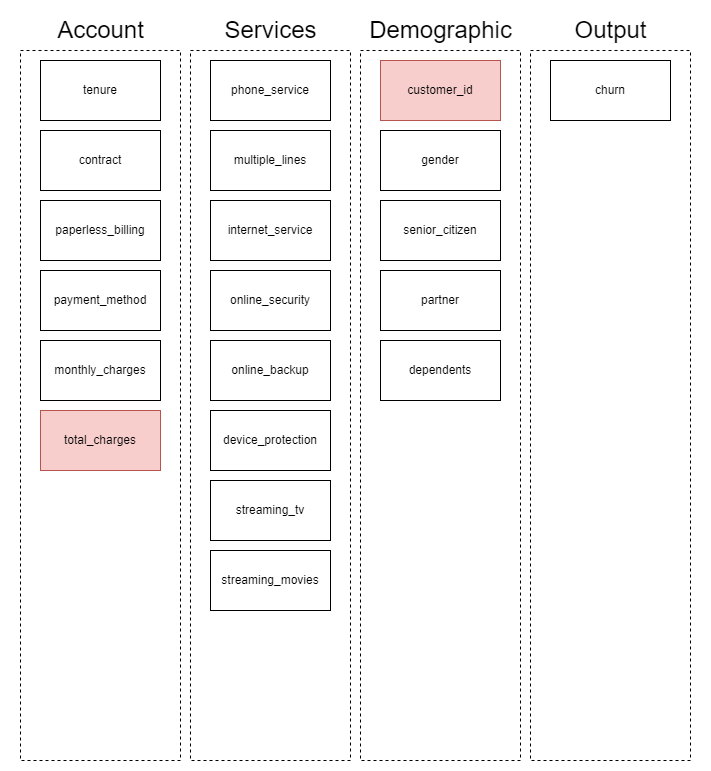

In [17]:
eda.drop('total_charges', axis=1, inplace=True)
Image(filename='img/p2m1_03.png')

**`multiple_lines` and `phone_service`**

Since they have 100% correlation, we can see their data using `crosstab`

In [18]:
pd.crosstab(eda['multiple_lines'], eda['phone_service'])

phone_service,No,Yes
multiple_lines,,
No,0,3390
No phone service,682,0
Yes,0,2971


it seems that `multiple_lines` give more information than `phone_service` while having 100% of `phone_service` information. We can delete `phone_service`

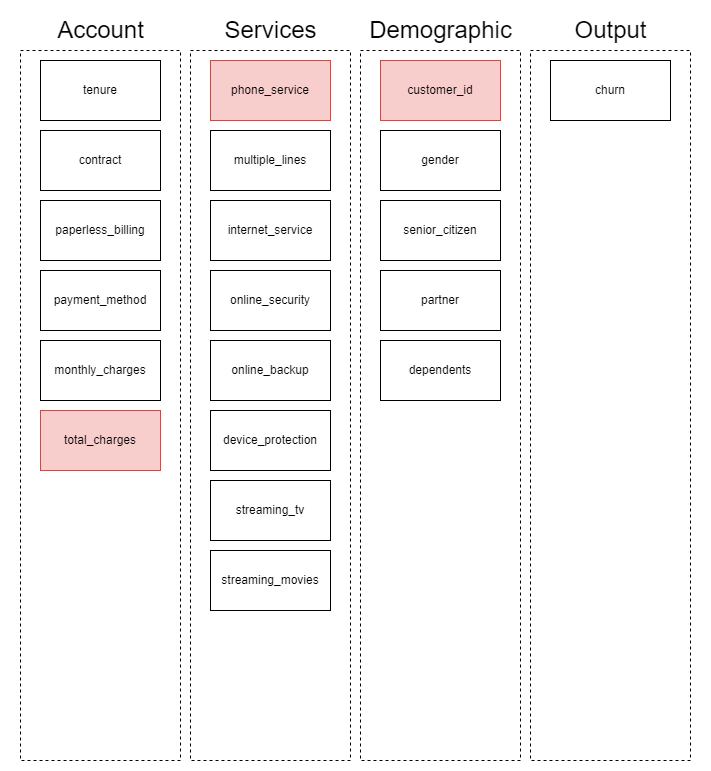

In [19]:
eda.drop('phone_service', axis=1, inplace=True)
Image(filename='img/p2m1_04.png')

**`gender`**

`gender` seems to have 0 correlation to churn, if we use crosstab we can see that are almost uniform.


In [20]:
pd.crosstab(eda['churn'], eda['gender'])


gender,Female,Male
churn,,
No,2549,2625
Yes,939,930


we can delete this data to decrease models complexity

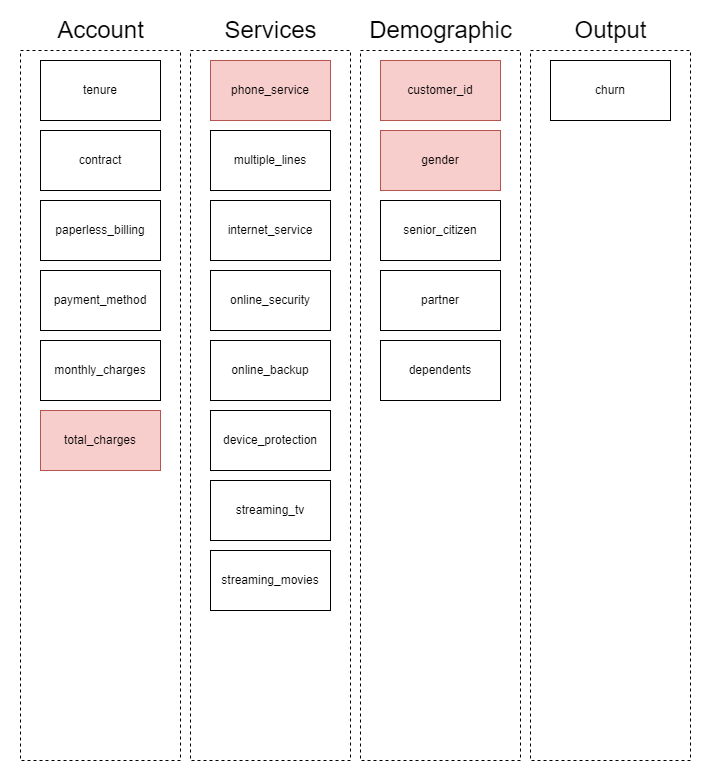

In [21]:
eda.drop('gender', axis=1, inplace=True)
Image(filename='img/p2m1_05.png')

## F. Account VS Output

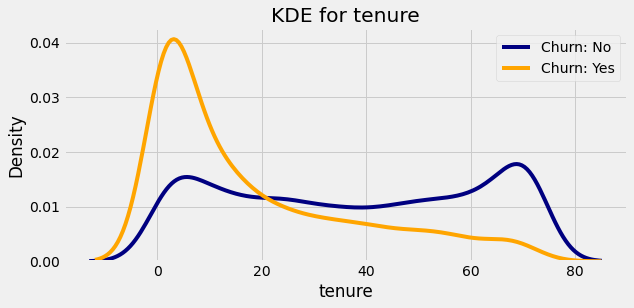

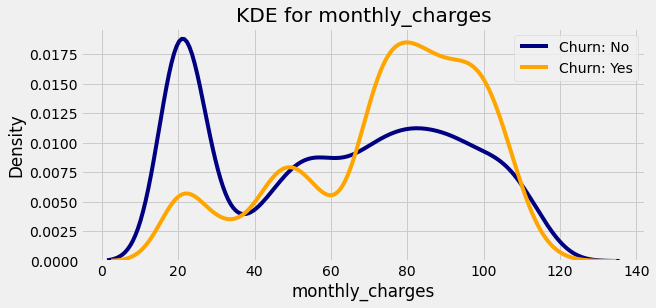

In [22]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(eda[eda['churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(eda[eda['churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
    plt.legend()
kdeplot('tenure')
kdeplot('monthly_charges')

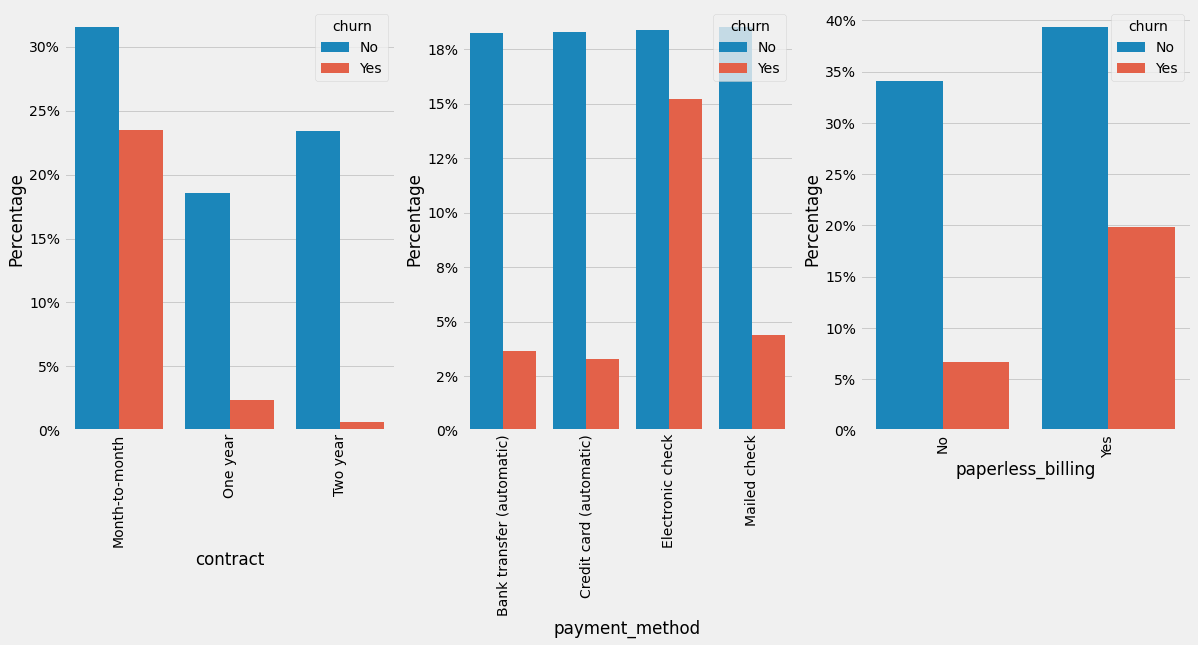

In [105]:
def barplot_percentages(features, columns=3, orient='v', axis_name="percentage of customers"):
    nrows = int(np.ceil(len(features) / columns))
    fig, axs = plt.subplots(nrows=nrows, ncols=columns, figsize=(columns*6, nrows*6))
    for i, feature in enumerate(features):
        if nrows == 1:
            ax = axs[i]
        else:
            ax = axs[i // columns, i % columns]

        g = eda.groupby(feature)["churn"].value_counts().to_frame()
        g = g.rename({"churn": axis_name}, axis=1).reset_index()
        g[axis_name] = g[axis_name]/len(eda)
        if orient == 'v':
            ax = sns.barplot(x=feature, y= axis_name, hue='churn', data=g, orient=orient, ax=ax)
            ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        else:
            ax = sns.barplot(x= axis_name, y=feature, hue='churn', data=g, orient=orient, ax=ax)
            ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        for item in ax.get_xticklabels():
            item.set_rotation(90)

        # ax.set_title(feature)
        ax.set_ylabel("Percentage")
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.7, wspace=0.2)

barplot_percentages(["contract", "payment_method", "paperless_billing"])

From those graph, we can conclude that:
* Higher `tenure` lead to lower `churn`
* Higher `monthly_charges` can lead to increase of `churn`
* Longer `contract` period, lead to lower `churn`
* electronic check `payment_method` have the highest `churn` rate of all `payment_method`
* `paperless_billing` customer tends to `churn` more

## G. Service VS Output

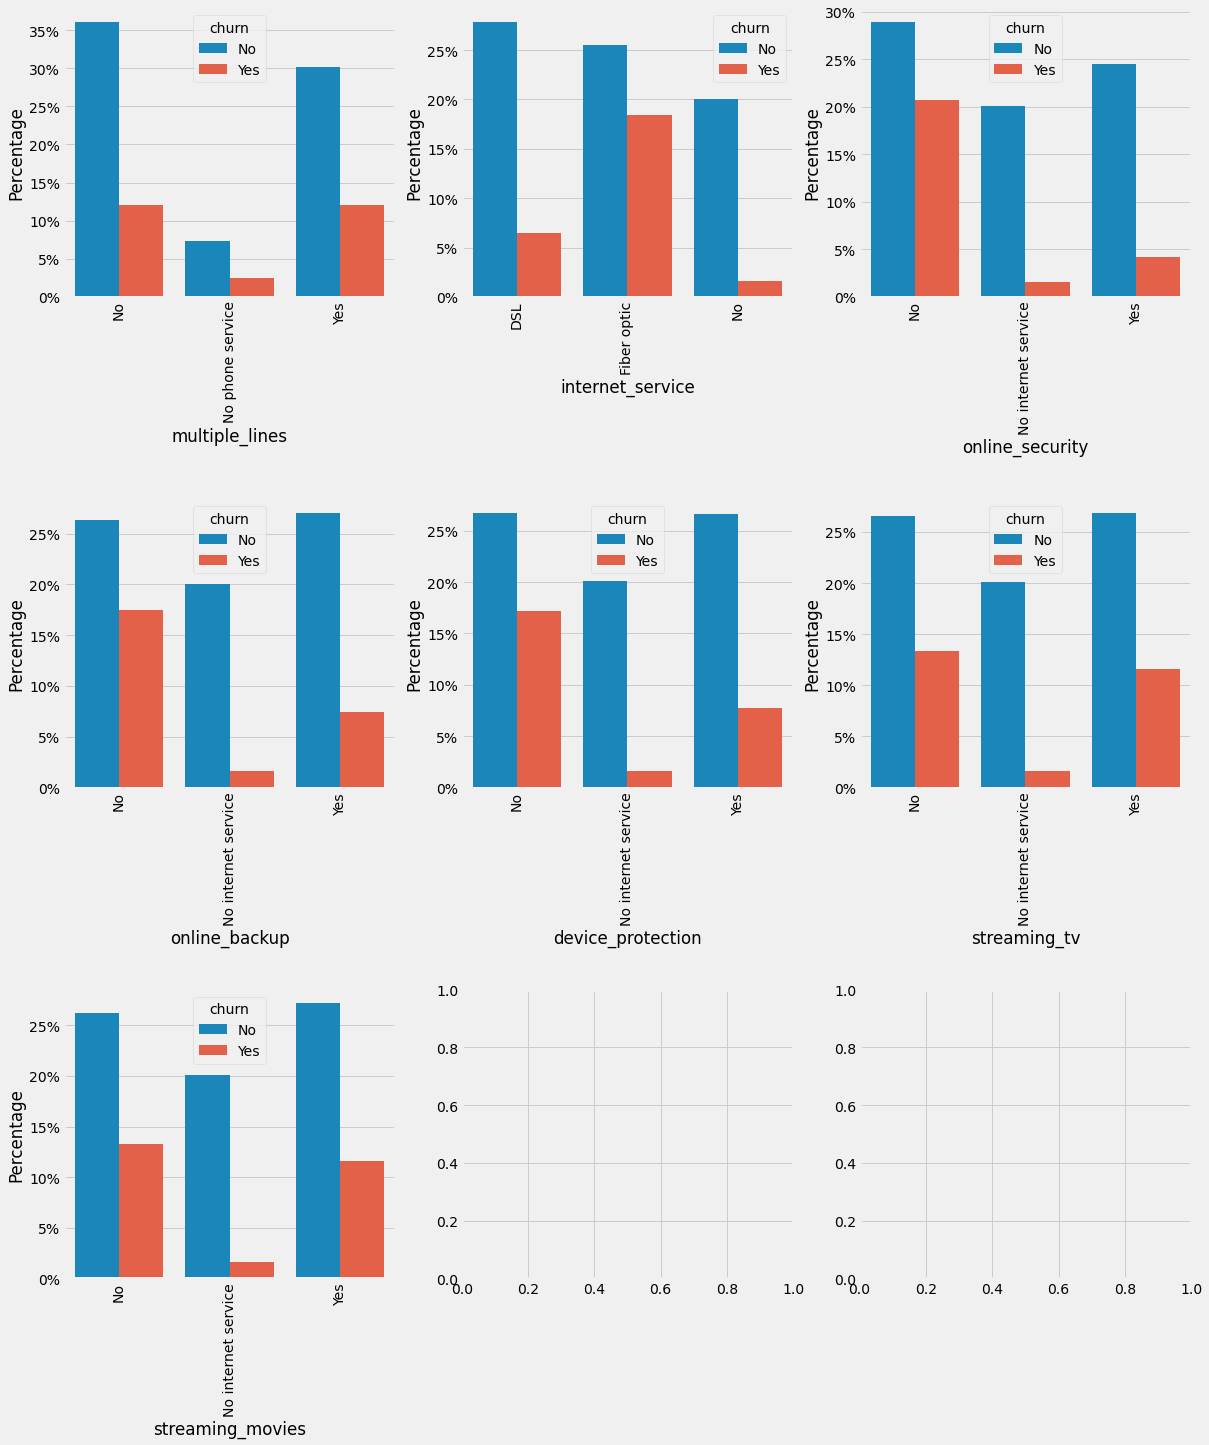

In [106]:
barplot_percentages(['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies'])

From those graph, we can conclude that:
* people who doesn't have internet service seems to have the least `churn` it's logical since they don't have anything worth to cancel
* People who have security service seems to less `churn`

## H. Demographic VS Output

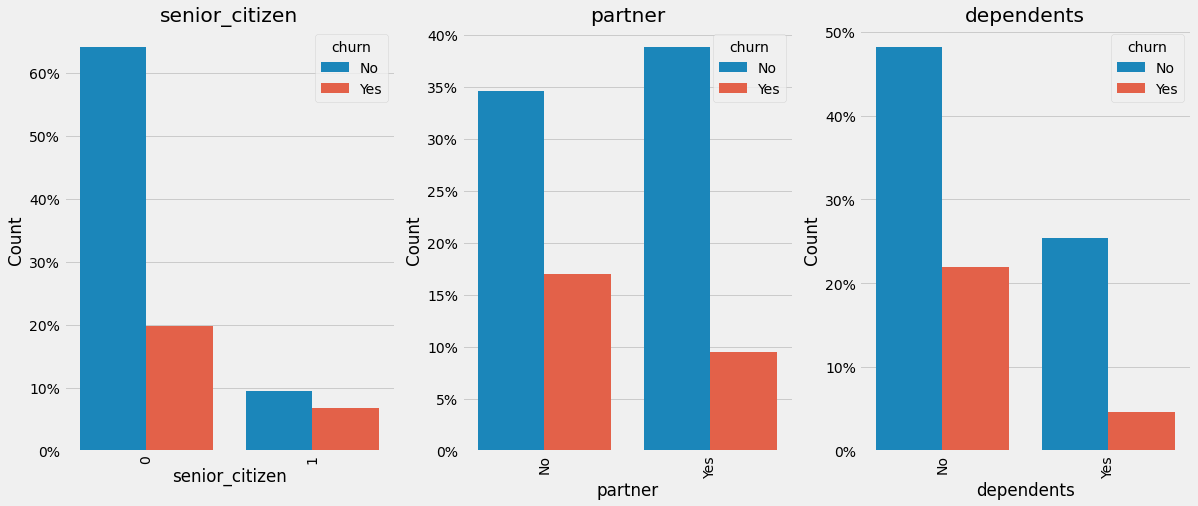

In [97]:

barplot_percentages(['senior_citizen', 'partner', 'dependents'])

From those graph, we can conclude that:
* Senior citizen seems more likely to `churn` in terms of percentage
* Having no `partner` will make it more likely to `churn`
* Same thing with having no `dependents`

# 5. Data Preprocessing

In [26]:
X_train, X_val, X_test, y_train, y_val, y_test = util.train_val_test_split(
    dataset.drop(['churn'], axis=1),
    dataset['churn'],
    val_size=0.2,
    test_size=0.2,
    random_state=random_state
)


X_demo, y_demo = X_train.copy(), y_train.copy()

## A. Drop Useless Columns

In [27]:
dropped_columns = ['customer_id', 'gender', 'total_charges', 'phone_service']
X_demo.drop(dropped_columns, axis=1, inplace=True)

## B. Imputation

In [28]:
num_cols = ['monthly_charges', 'tenure']

cat_cols = [
    'senior_citizen',
    'partner',
    'dependents',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'paperless_billing',
    'payment_method'
]

binary_cat_cols = [cname for cname in cat_cols if len(X_train[cname].unique()) == 2]
multiclass_cat_cols = [cname for cname in cat_cols if len(X_train[cname].unique()) > 2]

In [29]:
# impute missing value
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

X_demo[num_cols] = numerical_imputer.fit_transform(X_demo[num_cols])
X_demo[cat_cols] = categorical_imputer.fit_transform(X_demo[cat_cols])
X_demo.head()

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges
1397,0,No,No,4.0000,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.8500
7021,0,No,No,12.0000,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.8000
6709,0,Yes,No,50.0000,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,No,Electronic check,99.4000
4428,0,Yes,Yes,19.0000,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.3000
1035,0,No,No,66.0000,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.1000


## C. Scaling & Encoding

In [30]:
scaler = StandardScaler()
binary_encoder = OrdinalEncoder()
multiclass_encoder = OneHotEncoder(handle_unknown='ignore')

X_demo[num_cols] = scaler.fit_transform(X_demo[num_cols])
X_demo[binary_cat_cols] = binary_encoder.fit_transform(X_demo[binary_cat_cols])
ohe = pd.DataFrame(multiclass_encoder.fit_transform(X_demo[multiclass_cat_cols]).toarray())
X_demo.drop(multiclass_cat_cols, axis=1, inplace=True)
X_demo.reset_index(inplace=True)
ohe.reset_index(inplace=True)
X_demo.drop('index', axis=1, inplace=True)
ohe.drop('index', axis=1, inplace=True)
X_demo = pd.concat([X_demo, ohe], axis=1)
X_demo.head()


,senior_citizen,partner,dependents,tenure,paperless_billing,monthly_charges,0,1,2,3,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0000,-1.1384,1.0000,0.6086,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,-0.8143,1.0000,-0.1647,1.0000,0.0000,0.0000,1.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,0.0000,1.0000,0.0000,0.7250,0.0000,1.1638,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,0.0000,1.0000,1.0000,-0.5308,0.0000,1.2946,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
4,0.0000,0.0000,0.0000,1.3731,0.0000,-1.3287,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000


## D. Dimentional Reduction

In [31]:
X_demo_reducted = pd.DataFrame(PCA(n_components=0.99).fit_transform(X_demo))
X_demo_reducted.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.7512,-1.3678,-0.7288,0.6940,0.0126,-0.3803,0.1418,-1.1108,-0.4078,-0.3388,-0.4258,0.5442,0.8609,-0.7536,-0.4279,-0.1651,-0.3119,0.0061,0.1035,-0.1660
1,-0.1620,-1.0568,0.5703,0.9377,-0.4554,-0.0413,0.4302,0.7621,-0.6417,-0.4104,0.9801,-0.5858,0.0398,1.2213,-0.0157,-0.0637,-0.3079,-0.4326,-0.3933,0.1135
2,-1.5945,0.7659,-0.7909,0.0609,-0.6472,-0.5891,-0.0109,1.0546,-0.1850,-0.3087,0.7270,0.5635,0.0869,0.8687,0.8971,-0.1356,0.2780,0.0215,-0.2074,-0.4936
3,-1.5145,0.0053,-1.2314,0.8966,-0.5790,-0.4979,-0.5009,0.0952,1.1361,-0.7433,-0.2192,0.0432,-0.0133,0.4577,0.7551,-0.4836,-0.0016,0.3965,0.0640,-0.0144
4,2.5672,1.8230,-0.3871,-0.9158,-0.4151,0.2160,-0.8019,-0.0126,-0.6165,-0.0186,0.0588,-0.0121,-0.2884,-0.1509,0.6384,0.7874,-0.1279,0.0537,-0.0624,0.0331


## E. SKLearn Pipeline

In [32]:
class columnDropperTransformer():
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

    def fit(self, X, y=None):
        return self

dropped_columns = ['customer_id', 'gender', 'total_charges', 'phone_service']

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)
binary_cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder())
    ]
)
multiclass_cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = Pipeline(
    steps=[
        ("drop_columns", columnDropperTransformer(dropped_columns)),
        ("normalization", ColumnTransformer(
            transformers=[
                ('num_input', numerical_transformer, num_cols),
                ('bin_cat_input', binary_cat_transformer, binary_cat_cols),
                ('multi_cat_input', multiclass_cat_transformer, multiclass_cat_cols)
            ], remainder='passthrough'
        )),
        # ("oversampling", SMOTENC(random_state=random_state, categorical_features=list(range(2,37)))),
        ("reduction", PCA(n_components=0.99))
    ], verbose=True
)
y_train.replace({"Yes": 1, "No": 0}, inplace=True)
y_val.replace({"Yes": 1, "No": 0}, inplace=True)
y_test.replace({"Yes": 1, "No": 0}, inplace=True)


In [33]:
preprocessor

Pipeline(steps=[('drop_columns',
                 <__main__.columnDropperTransformer object at 0x0000019B4023EFB0>),
                ('normalization',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_input',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'tenure']),
                                                 ('bin_cat_input',
                                                  Pipeline(steps=[('imputer',
                                                                   Simp...
                                                 ('multi_cat_input',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'payment_method'])])),
                ('reduction', PCA(n_components=0.99))],
         verbose=True)

In [34]:
X_train_new = preprocessor.fit_transform(X_train)
# X_train_balanced, y_train_balanced = SMOTE(random_state=random_state).fit_resample(X_train_new, y_train)
X_test_new = preprocessor.transform(X_test)
X_val_new = preprocessor.transform(X_val)

[Pipeline] ...... (step 1 of 3) Processing drop_columns, total=   0.0s
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing reduction, total=   0.0s


## F. Tensorflow Pipeline

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_new, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024, seed=random_state).batch(128)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_new, y_val))
val_dataset = val_dataset.batch(128)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_new, y_test))
test_dataset = test_dataset.batch(128)


# 6. Model Definition

**Sequential**

In [57]:
model = keras.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(20,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                315       
                                                                 
 dropout_9 (Dropout)         (None, 15)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [59]:
opt = keras.optimizers.Adam(learning_rate=0.002, decay=1e-6)
model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

**Functional (only for demonstration)**

In [60]:
layer_input = layers.Input(shape=(20, ))
hidden_1 = layers.Dense(10, activation='relu')(layer_input)
dropout_1 = layers.Dropout(0.5)(hidden_1)
hidden_2 = layers.Dense(10, activation='relu')(dropout_1)
dropout_2 = layers.Dropout(0.5)(hidden_2)
hidden_3 = layers.Dense(5, activation='relu')(dropout_2)
dropout_3 = layers.Dropout(0.5)(hidden_3)
layer_output = layers.Dense(1, activation='sigmoid')(dropout_3)
model_functional = keras.Model(inputs=layer_input, outputs=layer_output)

In [40]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0     

In [41]:
model_functional.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

## 7. Model Training

In [42]:
# model functional only for demonstration
history = model_functional.fit(train_dataset,  epochs=2, batch_size=128, validation_data=val_dataset)

Epoch 1/2
34/34 [==============================] - 2s 10ms/step - loss: 0.7081 - accuracy: 0.5792 - val_loss: 0.5570 - val_accuracy: 0.7537
Epoch 2/2
34/34 [==============================] - 0s 6ms/step - loss: 0.6162 - accuracy: 0.6722 - val_loss: 0.5124 - val_accuracy: 0.7651


In [61]:
history = model.fit(train_dataset,  epochs=150, batch_size=128, validation_data=val_dataset)

Epoch 1/150
34/34 [==============================] - 2s 16ms/step - loss: 0.7303 - accuracy: 0.5676 - val_loss: 0.6773 - val_accuracy: 0.7523
Epoch 2/150
34/34 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.6857 - val_loss: 0.6660 - val_accuracy: 0.7346
Epoch 3/150
34/34 [==============================] - 0s 10ms/step - loss: 0.6643 - accuracy: 0.7273 - val_loss: 0.6551 - val_accuracy: 0.7331
Epoch 4/150
34/34 [==============================] - 0s 10ms/step - loss: 0.6507 - accuracy: 0.7363 - val_loss: 0.6458 - val_accuracy: 0.7331
Epoch 5/150
34/34 [==============================] - 0s 8ms/step - loss: 0.6430 - accuracy: 0.7325 - val_loss: 0.6379 - val_accuracy: 0.7331
Epoch 6/150
34/34 [==============================] - 0s 7ms/step - loss: 0.6328 - accuracy: 0.7368 - val_loss: 0.6293 - val_accuracy: 0.7331
Epoch 7/150
34/34 [==============================] - 0s 8ms/step - loss: 0.6246 - accuracy: 0.7399 - val_loss: 0.6219 - val_accuracy: 0.7331
Epoch 8/1

# 8. Model Evaluation

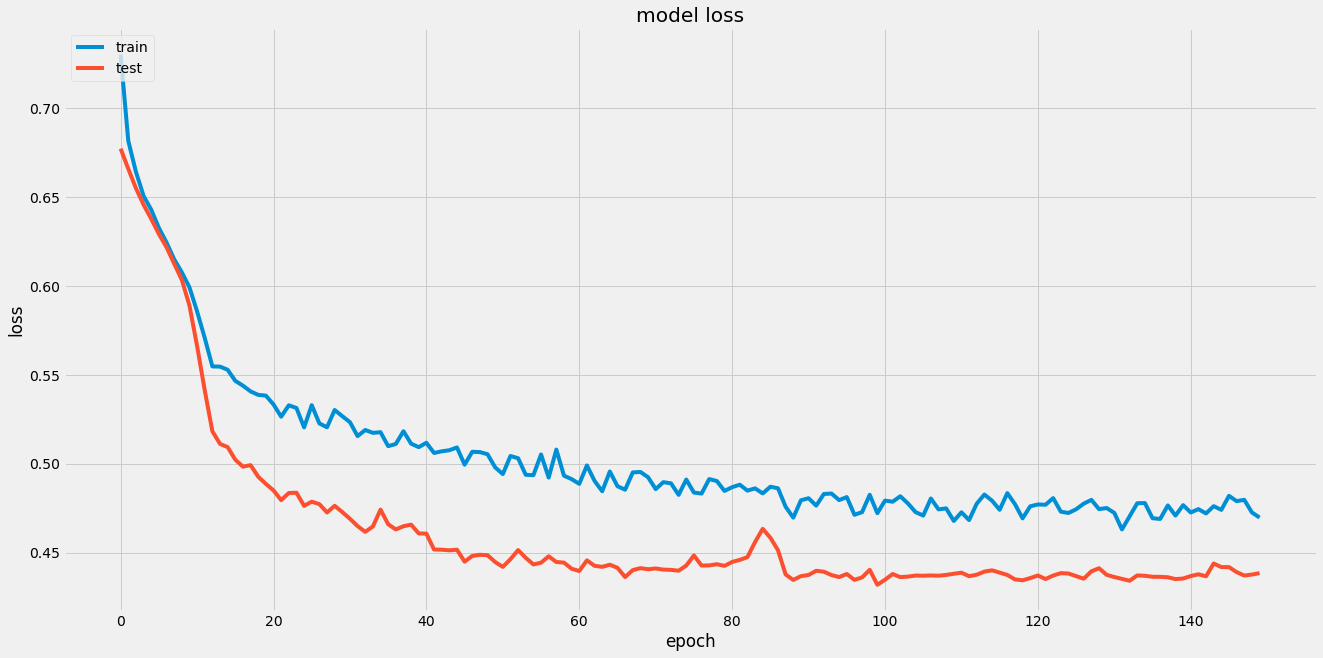

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Our model seems to underfit a little bit, I have three possible explanation:
1. Our `drop` layer is too high, meaning that the model are really hard to overfit.
2. Our `models` complexity is too low, they can't comprehend the data.

In [63]:
y_pred = model.predict(X_test_new)
y_pred = np.where(y_pred < 0.5, 0, 1).squeeze()
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1036
           1       0.68      0.32      0.44       373

    accuracy                           0.78      1409
   macro avg       0.74      0.63      0.65      1409
weighted avg       0.76      0.78      0.75      1409



Fortunately our models is the same for test dataset. The accuracy is not too different compared to validation and test

# 9. Model Saving

In [46]:
model.save("model.h5", include_optimizer=False) # tensorflow model

pickle_out = open("preprocessor.pkl", mode = "wb") # sklearn pipeline (preprocessor)
pickle.dump(preprocessor, pickle_out) 
pickle_out.close()

# 10. Model Inference

In [47]:
dataset['tech_support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [48]:
new_data = pd.DataFrame({
    'customer_id': ['pizza-ayam', 'kambing-terbang', 'bebek-angsa'],
    'gender': ['Female', 'Male', 'Female'],
    'senior_citizen': [0, 1, 0],
    'partner': ["No", "No", "No"],
    "dependents": ["No", "No", "No"],
    "tenure": [3, 18, 24],
    "phone_service": ["Yes", "Yes", "Yes"],
    "multiple_lines": ["Yes", "Yes", "Yes"],
    "internet_service": ["Fiber optic", "DSL", "Fiber optic"],
    "online_security": ["No", "Yes", "No"],
    "online_backup": ["No", "Yes", "No"],
    "device_protection": ["No", "Yes", "No"],
    "tech_support": ["No", "Yes", "No"],
    "streaming_tv": ["No", "Yes", "No"],
    "streaming_movies": ["No", "Yes", "No"],
    "contract": ["Month-to-month", "One year", "Two year"],
    "paperless_billing": ["Yes", "Yes", "No"],
    "payment_method": ["Electronic check", "Mailed check", "Bank transfer (automatic debit)"],
    "monthly_charges": [75.5000	, 108.15, 120.0],
    "total_charges": [220.6, 1800.0, 2640.0]
}, index=[0, 1, 2])


new_data = preprocessor.transform(new_data)
y_pred = model.predict(new_data)
y_pred = np.where(y_pred < 0.5, 0, 1).squeeze()
y_pred

array([1, 0, 0])

# 11. Conclusion

From EDA we can get several insights:
* Senior citizen seems more likely to `churn` in terms of percentage
* Having no `partner` or `dependents` will make it more likely to `churn`
* people who doesn't have internet service seems to have the least likely `churn`
* People who have security service seems least likely to `churn`
* Higher `tenure` lead to lower `churn`
* Higher `monthly_charges` can lead to increase of `churn`
* Longer `contract` period, lead to lower `churn`
* electronic check `payment_method` have the highest `churn` rate of all `payment_method`
* `paperless_billing` customer tends to `churn` more

The models we get are slightly underfit. With the accuracy of 78% I think it's good enough for now.  
Maybe we can train using oversampled dataset for decreasing `FNR`.  
If I have more time to do this, I probably going to create more model layers.  
`elu` seems to be a bit more unstable compared to `relu`
